# Homework

<br><br> 1. With the provided image (2faces.jpg), find the face loaction and  display the face with a rectangle drawn on the face.

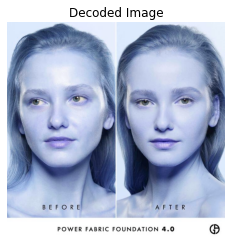

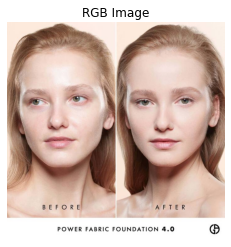

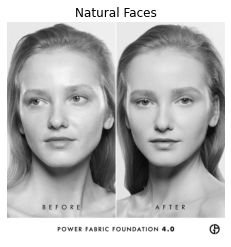

Faces Locations:
 [[ 18 124 310 310]
 [353 132 310 310]]


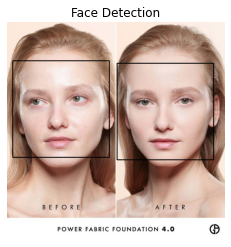

In [1]:
#  facial detection example
%matplotlib inline
import matplotlib.pyplot as plt  # used to plot our images
import cv2  # opencv 4.1.2 to read images
from pylab import rcParams  # used to change image size
import urllib.request as urlreq
import numpy as np

# read image with openCV
url = 'https://raw.githubusercontent.com/LiamWhitenack/Image-Processing-Course/main/2faces.jpg'
s = urlreq.urlopen(url)
img_array = np.array(bytearray(s.read()), dtype=np.uint8)
#  cv2.imdecode() function reads data from specified memory cache and converts (decodes) data into image format
image = cv2.imdecode(img_array, -1)

# plot image with matplotlib package
plt.axis('off')
plt.title('Decoded Image')
plt.imshow(image, cmap='gray')
plt.show()

####  image process the image
# convert image to RGB colour
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# plot image with matplotlib package
plt.axis('off')
plt.title('RGB Image')
plt.imshow(image_rgb)
plt.show()

# create a copy of the image to be used later
image_template = image_rgb.copy()

# convert image to Grayscale
image_gray = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2GRAY)

# remove axes and show image
plt.axis('off')
plt.title('Natural Faces')
plt.imshow(image_gray, cmap='gray')
plt.show()

# create an instance of the Face Detection Cascade Classifier
#  https://github.com/opencv/opencv/tree/master/data/haarcascades
ppath = 'haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(ppath)

# Detect faces using the haarcascade classifier on the "grayscale image"
faces = face_cascade.detectMultiScale(image_gray, 1.3, 5)

# Print coordinates of detected faces
print('Faces Locations:\n', faces)

for face in faces:
#  save the coordinates in x, y, w, d variables
    (x,y,w,d) = face
# Draw a black colored rectangle around each face using the face's coordinates
#   on the "image_template" with the thickness of 2 
    cv2.rectangle(image_template,(x,y),(x+w, y+d),(0, 0, 0), 2)

plt.axis('off')
plt.title('Face Detection')
plt.imshow(image_template)
plt.show()


<br><br>

2. Identify and using the face location, crop the first face and display and save it to a file.

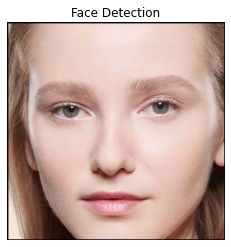

In [2]:
plt.axis('off')
cropped_image = image_template[y:y+w, x:x+d]
plt.title('Face Detection')
plt.imshow(cropped_image)
plt.show()

<br><br>

3. With the image used in #1, plot the landmark points in black on the face.

4.5.5
lbfmodel.yaml exists


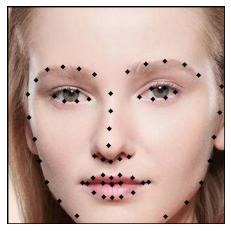

In [3]:
#  facial point detection example
#  pip install opencv-python
#  pip install opencv_contrib_python
%matplotlib inline
import matplotlib.pyplot as plt  # used to plot our images
import cv2  # opencv 4.1.2 to read images
import urllib.request as urlreq
import numpy as np
import os

black = (0,0,0)

print(cv2.__version__)
# save facial landmark detection model's url in LBFmodel_url variable
LBFmodel_url = "https://raw.githubusercontent.com/kurnianggoro/GSOC2017/master/data/lbfmodel.yaml"

# save facial landmark detection model's name as LBFmodel
LBFmodel = "lbfmodel.yaml"

# check if file is in working directory
if (LBFmodel in os.listdir(os.curdir)):
    print("lbfmodel.yaml exists")
else:
    # download picture from url and save locally as lbfmodel.yaml, < 54MB
    urlreq.urlretrieve(LBFmodel_url, LBFmodel)
    print("File downloaded")

# create an instance of the Facial landmark Detector with the model
landmark_detector  = cv2.face.createFacemarkLBF()
landmark_detector.loadModel(LBFmodel)

# convert image to Grayscale
image_gray = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)

# Detect faces using the haarcascade classifier on the "grayscale image"
ppath = 'haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(ppath)
faces = face_cascade.detectMultiScale(cropped_image, 1.3, 5)

# Detect landmarks on "image_gray"
ok, landmarks = landmark_detector.fit(image_gray, faces)

for landmark in landmarks:
    for x,y in landmark[0]:
        cv2.circle(cropped_image, (int(x), int(y)), 1, black, 4)  # display landmarks on image
plt.axis("off")
plt.imshow(cropped_image, cmap='gray')
plt.show()

<br><br>

4. Calculate and display the Delaunay Tessellation in black on the face.

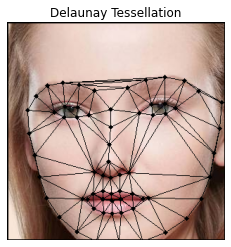

In [4]:
#  Delaunay Tessellation
import numpy as np
from scipy.spatial import Delaunay

for landmark in landmarks:
    points = landmark[0]
    indices = Delaunay(points).simplices
    vertices = points[indices]
    for vertice in vertices:
        pts = np.array(vertice, dtype=np.int32)
        pts = pts.reshape((-1, 1, 2))
        cv2.polylines(cropped_image, [pts], 1, black)
        
plt.axis('off')
plt.title('Delaunay Tessellation')
plt.imshow(cropped_image)
plt.show()

<br><br>

5. Repeat the average face example only using female faces.

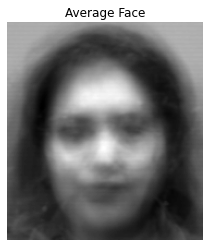

In [14]:
#  average face example
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import glob
import cv2
from cv2 import imread

#  https://cmp.felk.cvut.cz/~spacelib/faces/faces94.html
dir = 'C:/Users/liamw/Goober/Documents/Schoolwork/7 2022 Spring/CDS 468/Homework/faces94/female/**/**.jpg'
files = list(glob.iglob(dir, recursive=True))
img = np.zeros(imread(files[0],0).shape)
img = img.astype('int')
for i in range(len(files)):
    img += imread(files[i],0).astype('uint8')

img = np.divide(img,len(files))
img = np.mod(img,256)
img = img.astype(np.uint8)

plt.axis('off')
plt.title('Average Face')
plt.imshow(img, cmap='gray')
plt.show()

<br><br>

6. Repeat the average face example only using male faces.

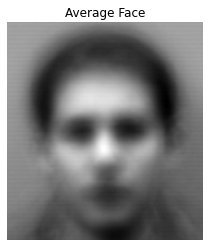

In [15]:
#  https://cmp.felk.cvut.cz/~spacelib/faces/faces94.html
dir = 'C:/Users/liamw/Goober/Documents/Schoolwork/7 2022 Spring/CDS 468/Homework/faces94/male/**/**.jpg'
files = list(glob.iglob(dir, recursive=True))
img = np.zeros(imread(files[0],0).shape)
img = img.astype('int')
for i in range(len(files)):
    img += imread(files[i],0).astype('uint8')

img = np.divide(img,len(files))
img = np.mod(img,256)
img = img.astype(np.uint8)

plt.axis('off')
plt.title('Average Face')
plt.imshow(img, cmap='gray')
plt.show()

<br><br>

7. What differences do you see between the averaged female and male faces?

<b> it looks like the male faces have more eye socket concavity, a thinner jaw, shorter hair, darker lips, and brighter skin. This would probably not be so true with a different training set.